In [16]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import warnings
warnings.filterwarnings('ignore')

In [17]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [18]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [19]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [20]:
df_fake['class'] = 0
df_true['class'] = 1

In [21]:
df_fake.shape

(23481, 5)

In [22]:
df_true.shape

(21417, 5)

In [23]:
df_true.shape

(21417, 5)

In [24]:
df_fake_testing = df_fake.tail(10)

for i in range(23480, 23470, -1):
    df_fake.drop([i],axis = 0, inplace = True)

In [25]:
df_fake.shape

(23471, 5)

In [26]:
df_true_testing = df_true.tail(10)

for i in range(21416, 21406, -1):
    df_true.drop([i], axis = 0, inplace = True)

In [27]:
df_true.shape

(21407, 5)

In [28]:
df_fake_testing['class'] = 0
df_true_testing['class'] = 1

In [29]:
df_fake_testing.head()

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0


In [30]:
df_true_testing.head()

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1


In [40]:
data = pd.concat([df_fake, df_true], axis = 0)
data.sample(10)

,title,text,subject,date,class
4807,There Was Something Weird About Trump’s Hair ...,"Boy, wasn t Wednesday an embarrassing day for ...",News,"September 1, 2016",0
8670,Kerry says U.S. remains committed to NATO alli...,WASHINGTON (Reuters) - The Obama administratio...,politicsNews,"July 21, 2016",1
4895,Lawmakers vow to fight proposed cuts in Chesap...,WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,"March 17, 2017",1
3922,Tim Kaine Reveals Who’s Trying To Steal The E...,"Senator Tim Kaine, the Democratic Party s vice...",News,"November 5, 2016",0
23245,‘Feel Good Hoax’: How US Propaganda Works in t...,21st Century Wire says One thing is certain ab...,Middle-east,"September 29, 2016",0
17102,Billionaire Branson targeted in $5 million sca...,"LONDON (Reuters) - Richard Branson, billionair...",worldnews,"October 18, 2017",1
2802,Trump BETRAYED: GOP Rep. DEFENDS Refugees Aga...,Republican Congressman Charlie Dent represents...,News,"January 28, 2017",0
5526,Japan says Trump-Xi call is positive for regio...,WASHINGTON (Reuters) - Japan views U.S. Presid...,politicsNews,"February 10, 2017",1
7054,Obama says history will judge Castro's impact ...,WASHINGTON (Reuters) - U.S. President Barack O...,politicsNews,"November 26, 2016",1
14526,China calls for peaceful Zimbabwe resolution u...,BEIJING (Reuters) - China s Foreign Ministry c...,worldnews,"November 17, 2017",1


In [41]:
data.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [42]:
data.reset_index(inplace = True)

In [43]:
data.sample(10)

,index,title,text,subject,date,class
16618,16618,WHOA! ROCK LEGEND Roger Daltrey Rips EU For “R...,WHO knew legendary rocker Roger Daltrey was su...,Government News,"May 10, 2016",0
43510,20039,U.S. calls on China to use 'powerful tool' of ...,LONDON (Reuters) - U.S. Secretary of State Rex...,worldnews,"September 14, 2017",1
15942,15942,Finger Wagging Maxine Waters on Illegal Aliens...,Maxine Waters is one angry woman. She has gone...,Government News,"Sep 18, 2017",0
12308,12308,TUCKER CARLSON Demolishes Business Owner Who W...,,politics,"Nov 24, 2016",0
19836,19836,DID HILLARY REALLY THINK She’d Get Away With T...,It s not a big surprise given her propensity f...,left-news,"Oct 9, 2016",0
38625,15154,Indonesian parliament speaker again named susp...,JAKARTA (Reuters) - Indonesia s speaker of par...,worldnews,"November 10, 2017",1
18364,18364,WOW! LOU DOBBS BLASTS #FakePresident OBAMA: “S...,Lou Dobbs went off on #FakePresident Barack Ob...,left-news,"Jul 7, 2017",0
33826,10355,Inside Kasich's long-shot strategy to beat Tru...,"HEATH, Ohio (Reuters) - Microphone in hand, Re...",politicsNews,"March 14, 2016",1
8678,8678,How Wounded Warrior Project Treated A Triple-...,This just goes to show that you should always ...,News,"January 18, 2016",0
6399,6399,Desperate Republicans Are Begging Documented ...,Congressional Republicans are so pathetically ...,News,"May 13, 2016",0


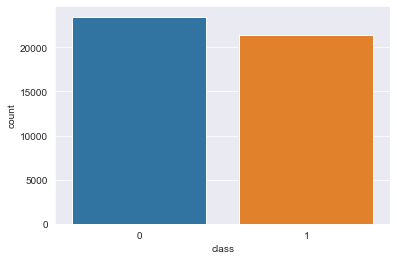

In [44]:
sns.set_style("darkgrid")
sns.countplot(data['class']);

In [45]:
data.isnull().sum()

index      0
title      0
text       0
subject    0
date       0
class      0
dtype: int64

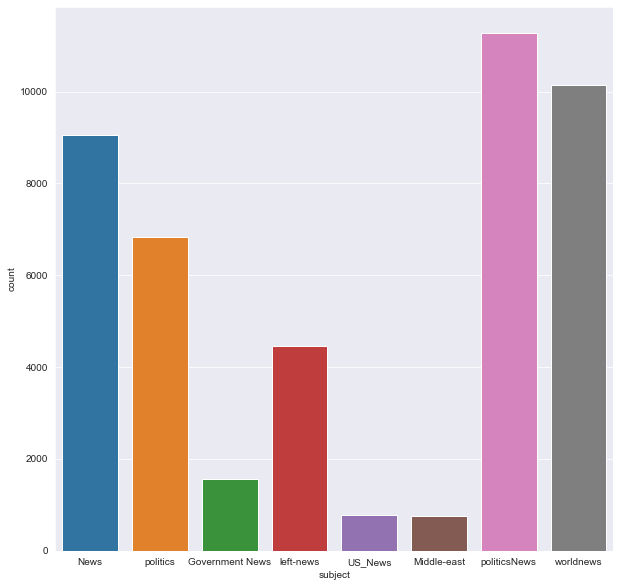

In [46]:
data['subject'].value_counts()
plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
sns.countplot(data['subject']);

[Text(0, 0, '0'), Text(1, 0, '1')]

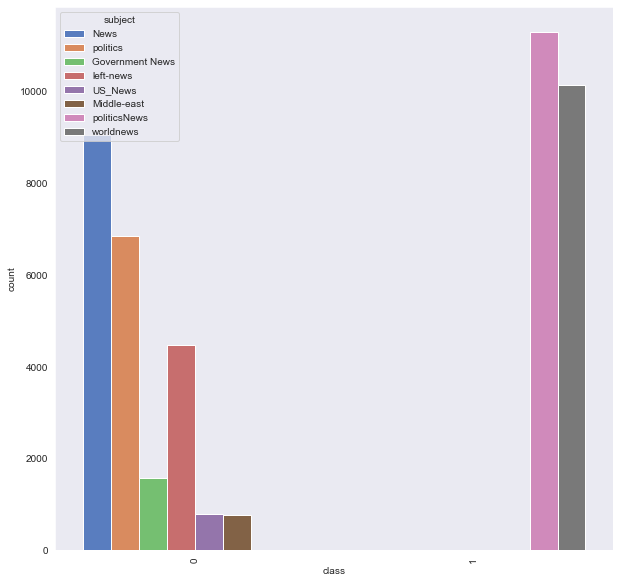

In [47]:
plt.figure(figsize = (10,10))
sns.set_style("dark")
chart = sns.countplot(x = "class", hue = "subject" , data = data , palette = 'muted')
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [48]:
data['text'] = data['title'] + " " + data['text']
data = data.drop(['title', 'subject', 'date'], axis=1)

In [49]:
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [51]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(data[data['class'] == 0].text)) 


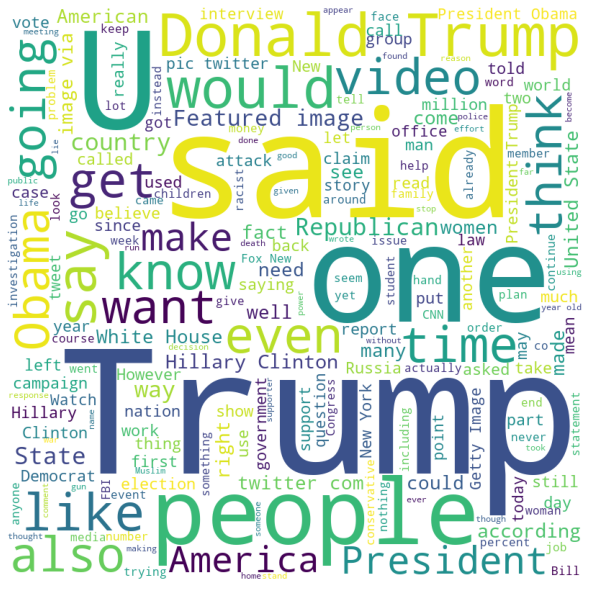

In [52]:
# plot the word cloud for fake news data     

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [53]:
from wordcloud import WordCloud

In [55]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(data[data['class'] == 1].text))

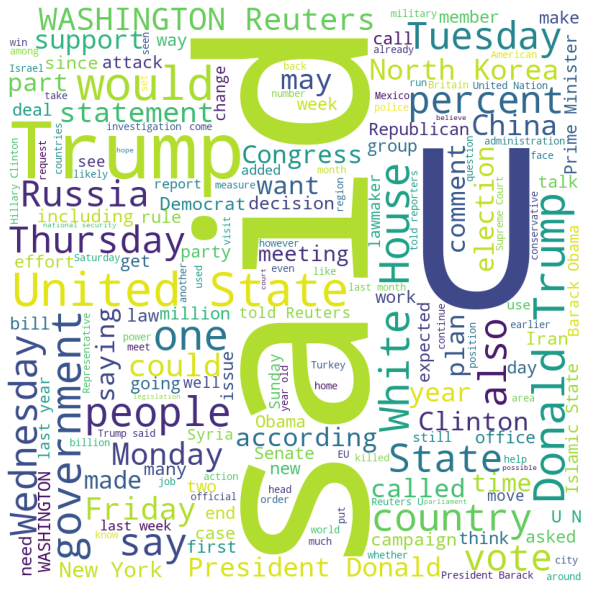

In [56]:
# plot the WordCloud image for genuine news data    

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [57]:
#splitting data for training and testing

import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data['text'],data['class'],test_size=0.2, random_state = 1)

In [60]:
#Multinomial NB

!pip install mlxtend
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics                                                 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [61]:
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

In [62]:
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

In [63]:
score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])

accuracy:   94.029


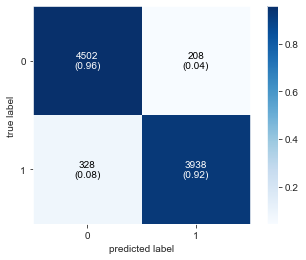

In [64]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [65]:
#SVM

from sklearn.svm import LinearSVC

In [66]:
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC())
])

In [67]:
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

In [68]:
score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])

accuracy:   99.365


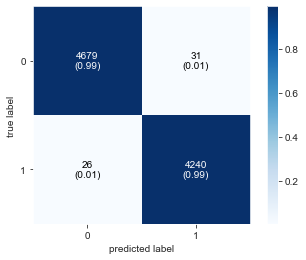

In [69]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [70]:
#Passive Aggressive Classifier

from sklearn.linear_model import PassiveAggressiveClassifier

In [71]:
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf',  PassiveAggressiveClassifier())
])

In [72]:
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

In [73]:
score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])

accuracy:   99.499


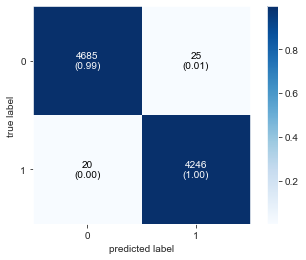

In [74]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()